Project: NLP for Requirements Engineering Interview Transcripts

Fourth SQL Query: PIM/ MDM Tags and Titles
 **Project: NLP for Requirements Engineering Interview Transcripts**
 
 Second SQL Query: Requirements Tags and Titles including scores

**Query**

SELECT TOP 1000
    q.Id AS QuestionId,
    q.Title AS QuestionTitle,
    q.Body AS QuestionBody,
    q.Tags AS QuestionTags,
    q.CreationDate AS Date,
    q.ViewCount AS ViewCount,
    q.Score AS Score,
    q.AnswerCount AS NumberOfAnswers,
    a.Id AS AnswerId,
    a.Body AS AnswerBody
FROM 
    Posts q
INNER JOIN 
    Posts a ON a.ParentId = q.Id
WHERE 
    q.PostTypeId = 1
    AND (q.Tags LIKE '%<product-data>%'
        OR q.Tags LIKE '%<PIM>%'
        OR q.Tags LIKE'%<master-data-management>%'
        OR q.Tags LIKE'%<mdm>%'
        OR q.Tags LIKE'%<data-integration>%'
        OR q.Tags LIKE'%<data-flow>%'
        OR q.Tags LIKE'%<data-mapping>%'
        OR q.Tags LIKE'%<data-matching>%'
        OR q.Tags LIKE'%<data-synchronization>%'
        OR q.Title LIKE'%data integration%'
        OR q.Title LIKE'%data flow%'
        OR q.Title LIKE'%data mapping%'
        OR q.Title LIKE'%data synchronization%'
        OR (q.Title LIKE '%Product data%' AND q.Title LIKE '%data%')
        OR (q.Title LIKE '%data management%' AND q.Title LIKE '%product%')
    ) 
    AND q.CreationDate >= '2018-01-01'
ORDER BY 
    q.CreationDate DESC;

**Tags**

product-data

PIM

master-data-management

mdm

data-integration

data-flow

data-mapping

data-matching

data-synchronization

**Title** 

data integration

data flow

data mapping

data synchronization

Product data

data

%data management%' AND q.Title LIKE '%product%'

**Combine data sets into a single one with 1000 rows**

In [1]:
import pandas as pd

# Load the datasets into pandas DataFrames
df = pd.read_csv('4query_PIM_MDM.csv')
# Join the DataFrames
#df = pd.concat([data1, data2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
#df.to_csv('df.csv', index=False)

In [2]:
len(df)

500

**Initial Exploration**

In [3]:
# Check for duplicates based on the 'QuestionId' and 'AnswerId' columns
df_no_duplicates = df.drop_duplicates(subset=['QuestionId', 'AnswerId'])

In [4]:
len(df_no_duplicates)

500

In [5]:
df.head(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody
0,76024216,How to track data flow inside a pipelined proc...,<p>Let's say we have a canonical in-order 5 st...,<hash><hardware><cpu-registers><riscv><processor>,2023-04-15 18:59:30,25,0,1,76024371,<p>I might use careful naming and analysis of ...
1,76023141,How data flows to executor in spark job proces...,<p>I am running spark on top of hadoop cluster...,<apache-spark>,2023-04-15 15:17:54,17,0,1,76024623,<p>Any HDFS Client can read remote data blocks...
2,75984270,parameterize the count of input file rows in a...,<ol>\n<li><p>I have input file as csv now i wa...,<azure><azure-data-factory>,2023-04-11 09:19:58,42,0,1,75995504,<p>I have csv file in my blob storage named &q...


In [6]:
df.tail(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody
497,62202159,React Initializing and synchronizing state wit...,<p>I wonder what is the best way/pattern to in...,<reactjs><react-hooks><data-synchronization>,2020-06-04 18:55:35,907,1,2,62202502,<p>your app does other stuff while it's busy <...
498,62202159,React Initializing and synchronizing state wit...,<p>I wonder what is the best way/pattern to in...,<reactjs><react-hooks><data-synchronization>,2020-06-04 18:55:35,907,1,2,62202515,<blockquote>\n <p>What would the best approac...
499,62199256,Passing a dataset parameter in a data mapping ...,"<p>I have a parametrized dataset, that I used ...",<azure-data-factory>,2020-06-04 16:09:09,2042,0,2,62202562,<p>Parameterized Data Sets work exactly the sa...


In [7]:
# Identify missing values:
df.isnull().sum()

# Entferne NaN_Werte falls zutreffend: df.dropna(inplace=True)

QuestionId         0
QuestionTitle      0
QuestionBody       0
QuestionTags       0
Date               0
ViewCount          0
Score              0
NumberOfAnswers    0
AnswerId           0
AnswerBody         0
dtype: int64

In [8]:
# Convert the 'Date' column to a datetime object to allow for better manipulation:
df['Date'] = pd.to_datetime(df['Date'])

**Explore the data**

In [9]:
unique_question_tags = df['QuestionTags'].nunique()

print(f"There are {unique_question_tags} unique question tags in the dataset.")

There are 314 unique question tags in the dataset.


In [10]:
# Show unique question tags
df['QuestionTags'].unique()

array(['<hash><hardware><cpu-registers><riscv><processor>',
       '<apache-spark>', '<azure><azure-data-factory>',
       '<sql-server><tsql><ssis><data-integration>',
       '<azure-data-factory>',
       '<mongodb><spring-boot><data-synchronization>',
       '<azure><azure-data-factory><etl>',
       '<google-oauth><google-cloud-dataflow><google-secret-manager>',
       '<azure-data-lake-gen2><azure-data-factory>',
       '<arrays><json><azure><azure-data-factory>',
       '<arrays><json><azure-data-factory>',
       '<azure><azure-devops><azure-functions><azure-data-factory><azure-synapse>',
       '<powershell><azure-active-directory><microsoft-graph-api><mdm><intune>',
       '<android><qt><mdm>', '<javascript><reactjs><typescript>',
       '<flutter><graph><cloud><local><data-synchronization>',
       '<r><shiny><dt><data-synchronization>', '<mdm><apple-developer>',
       '<azure><mapping><azure-data-factory>', '<jitterbit>',
       '<ios><flutter><client-certificates><mdm><mtl

In [11]:
df['QuestionTags'].value_counts().head(50)

QuestionTags
<azure-data-factory>                                                       47
<azure><azure-data-factory>                                                41
<spring-cloud-stream><spring-cloud-dataflow>                                8
<spring-cloud-dataflow>                                                     6
<azure-data-factory><azure-synapse>                                         5
<database><algorithm><architecture>                                         4
<c++><multithreading>                                                       4
<regex><azure><azure-data-factory>                                          3
<c><linux><unix><pipe><pipeline>                                            3
<applescript><mdm><privacy-policy>                                          3
<android><mdm><android-management-api>                                      3
<pentaho><pentaho-spoon><pentaho-data-integration>                          3
<sql-server><ssis>                                 

In [12]:
df['QuestionTags'].describe()

count                      500
unique                     314
top       <azure-data-factory>
freq                        47
Name: QuestionTags, dtype: object

In [13]:
# Count the number of unique questions in the dataset
unique_questions_count = df['QuestionId'].nunique()

print(f"There are {unique_questions_count} unique questions in the dataset.")

There are 420 unique questions in the dataset.


In [14]:
unique_answers_count = df['AnswerId'].nunique()
print(f'There are {unique_answers_count} unique answers in the dataset.')

There are 500 unique answers in the dataset.


In [15]:
# Examine the basic statistics of the dataset:
df.describe()

,QuestionId,Date,ViewCount,Score,NumberOfAnswers,AnswerId
count,5.000000e+02,500,500.000000,500.000000,500.000000,5.000000e+02
mean,6.936029e+07,2021-10-18 06:46:21.516000,515.348000,0.400000,1.386000,6.968662e+07
min,6.219926e+07,2020-06-04 16:09:09,17.000000,-3.000000,1.000000,6.220250e+07
25%,6.597904e+07,2021-01-31 13:22:59,93.000000,0.000000,1.000000,6.612144e+07
50%,6.946254e+07,2021-10-06 08:22:11.500000,229.000000,0.000000,1.000000,7.000268e+07
75%,7.289710e+07,2022-07-07 11:36:23.249999872,531.500000,1.000000,2.000000,7.320152e+07
max,7.602422e+07,2023-04-15 18:59:30,12749.000000,5.000000,4.000000,7.602462e+07
std,4.125027e+06,NaN,982.073978,0.976682,0.682595,4.123104e+06


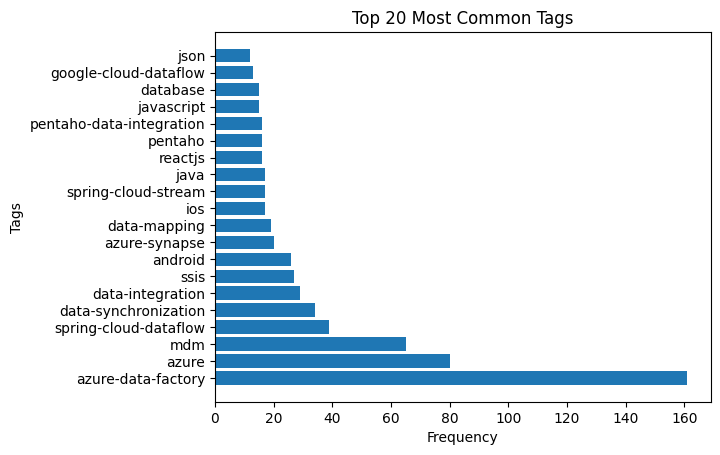

In [16]:
# Analyze the most common tags:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
tags = df['QuestionTags'].str.findall('<(.*?)>').explode().values
tag_counts = Counter(tags)
most_common_tags = tag_counts.most_common(20)

plt.barh([tag for tag, _ in most_common_tags], [count for _, count in most_common_tags])
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.title('Top 20 Most Common Tags')
plt.show()

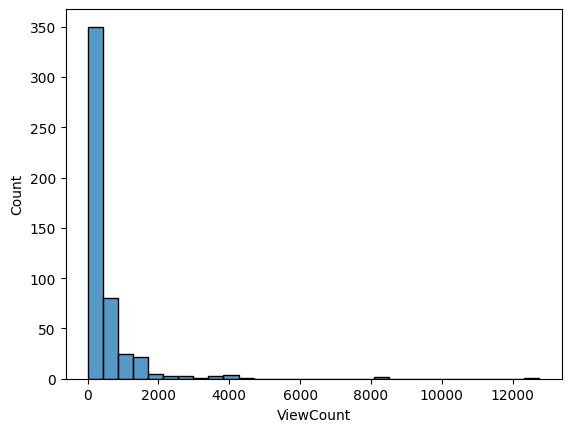

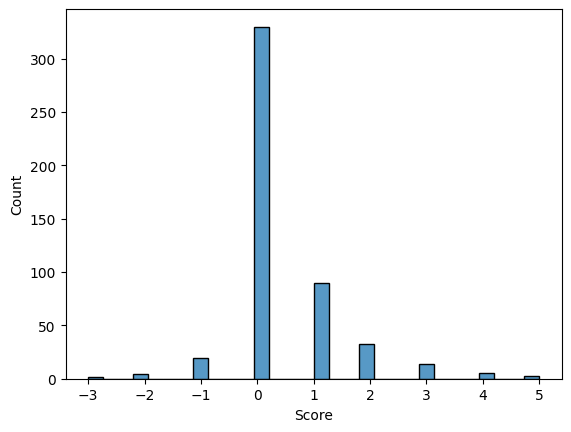

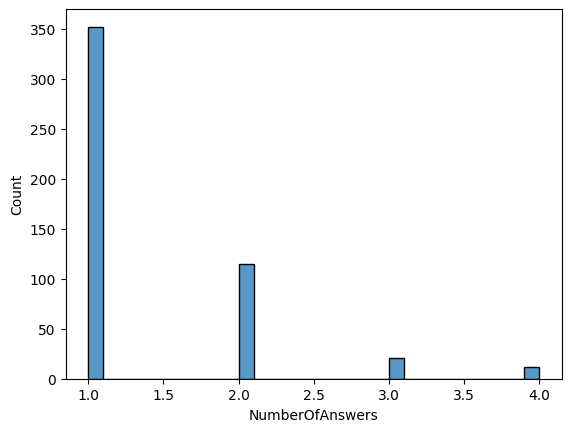

In [17]:
# Visualize the distribution of ViewCount, Score, and NumberOfAnswers:
#!pip install seaborn

sns.histplot(data=df, x='ViewCount', bins=30)
plt.show()

sns.histplot(data=df, x='Score', bins=30)
plt.show()

sns.histplot(data=df, x='NumberOfAnswers', bins=30)
plt.show()

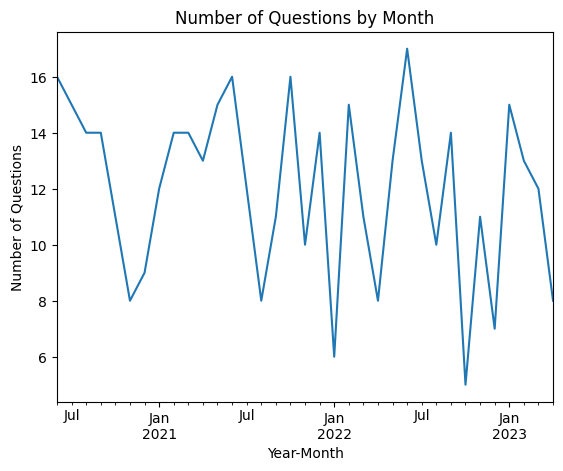

In [18]:
# Analyze the distribution of questions over time:

df['YearMonth'] = df['Date'].dt.to_period('M')

question_count_by_month = df.groupby('YearMonth')['QuestionId'].nunique()
question_count_by_month.plot()
plt.xlabel('Year-Month')
plt.ylabel('Number of Questions')
plt.title('Number of Questions by Month')
plt.show()

**NLP-Pre-Processing**

**_always:_** lowercasing, removal of non-alphanumeric characters

**_depends_** on task and corpus:* stopwords removal, lemmatization (for spaCy stopwords have to be removed)

Using BeautifulSoup to clean the question and answer body is helpful because it helps remove any HTML tags present in the text. The Stack Overflow dataset often contains text with HTML tags. 

These tags don't provide any valuable information for most NLP tasks and can be considered noise in the text data.

In [19]:
from bs4 import BeautifulSoup

df['CleanedQuestionBody'] = df['QuestionBody'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df['CleanedAnswerBody'] = df['AnswerBody'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [31]:
# Remove any unnecessary characters, such as punctuation, numbers, or extra whitespace, 
# and convert the text to lowercase:

import re

def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = re.sub(r'\d+', ' ', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespace
    text = text.replace('<code>', '').replace('</code>', '')  # Remove <code> tags
    return text

df['CleanedQuestionBody'] = df['CleanedQuestionBody'].apply(clean_text)
df['CleanedAnswerBody'] = df['CleanedAnswerBody'].apply(clean_text)

In [21]:
# Extract tags from 'QuestionTags' column and store them in extra column:
df['Tags'] = df['QuestionTags'].str.findall('<(.*?)>')

In [22]:
df.head(3)

,QuestionId,QuestionTitle,QuestionBody,QuestionTags,Date,ViewCount,Score,NumberOfAnswers,AnswerId,AnswerBody,YearMonth,CleanedQuestionBody,CleanedAnswerBody,Tags
0,76024216,How to track data flow inside a pipelined proc...,<p>Let's say we have a canonical in-order 5 st...,<hash><hardware><cpu-registers><riscv><processor>,2023-04-15 18:59:30,25,0,1,76024371,<p>I might use careful naming and analysis of ...,2023-04,let s say we have a canonical in order stage...,i might use careful naming and analysis of the...,"[hash, hardware, cpu-registers, riscv, processor]"
1,76023141,How data flows to executor in spark job proces...,<p>I am running spark on top of hadoop cluster...,<apache-spark>,2023-04-15 15:17:54,17,0,1,76024623,<p>Any HDFS Client can read remote data blocks...,2023-04,i am running spark on top of hadoop cluster ha...,any hdfs client can read remote data blocks th...,[apache-spark]
2,75984270,parameterize the count of input file rows in a...,<ol>\n<li><p>I have input file as csv now i wa...,<azure><azure-data-factory>,2023-04-11 09:19:58,42,0,1,75995504,<p>I have csv file in my blob storage named &q...,2023-04,i have input file as csv now i want to generat...,i have csv file in my blob storage named dbo c...,"[azure, azure-data-factory]"


In [23]:
column_names = df.columns
print(column_names)

Index(['QuestionId', 'QuestionTitle', 'QuestionBody', 'QuestionTags', 'Date',
       'ViewCount', 'Score', 'NumberOfAnswers', 'AnswerId', 'AnswerBody',
       'YearMonth', 'CleanedQuestionBody', 'CleanedAnswerBody', 'Tags'],
      dtype='object')


In [24]:
# Tokenization (split text into individual words):
from nltk.tokenize import word_tokenize

df['TokenizedQuestionBody'] = df['CleanedQuestionBody'].apply(word_tokenize)
df['TokenizedAnswerBody'] = df['CleanedAnswerBody'].apply(word_tokenize)

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['LemmatizedQuestionBody'] = df['TokenizedQuestionBody'].apply(lemmatize_tokens)
df['LemmatizedAnswerBody'] = df['TokenizedAnswerBody'].apply(lemmatize_tokens)

In [26]:
# Remove stopwords from the 'LemmatizedQuestionBody' column:

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['LemmatizedQuestionBody'] = df['LemmatizedQuestionBody'].apply(remove_stopwords)

In [27]:
# Show if new columns were added
column_names = df.columns
print(column_names)

Index(['QuestionId', 'QuestionTitle', 'QuestionBody', 'QuestionTags', 'Date',
       'ViewCount', 'Score', 'NumberOfAnswers', 'AnswerId', 'AnswerBody',
       'YearMonth', 'CleanedQuestionBody', 'CleanedAnswerBody', 'Tags',
       'TokenizedQuestionBody', 'TokenizedAnswerBody',
       'LemmatizedQuestionBody', 'LemmatizedAnswerBody'],
      dtype='object')


**Preprocess and analyze with spaCy**

In [28]:
# remove <code> and </code> tags, which are commonly used 
# in Stack Overflow posts to denote code snippets. 
def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convert the list to a string by joining its elements
        #text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
        #text = re.sub(r'\d+', ' ', text)  # Remove digits
        #text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespace
        #text = text.replace('<code>', '').replace('</code>', '')  # Remove <code> tags
    return text

In [29]:
#This code uses spaCy to analyze the text and extract entities, nouns, and verbs. Finally, it 
# displays the top 10 most common entities, nouns, and verbs found in the dataset.

# You can further customize this analysis by extracting more specific information 
# relevant to your domain or by using different NLP techniques, such as topic 
# modeling, sentiment analysis, or clustering.

import spacy
from collections import defaultdict

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Analyze the text and extract entities, nouns, and verbs
entities_counter = defaultdict(int)
nouns_counter = defaultdict(int)
verbs_counter = defaultdict(int)

for _, row in df.iterrows():
    question_body = preprocess_text(row['LemmatizedQuestionBody'])
    
    for text in [question_body]:
        doc = nlp(text)
        
        for ent in doc.ents:
            entities_counter[ent.text.lower()] += 1
        
        for token in doc:
            if token.pos_ == 'NOUN' and token.is_alpha:
                nouns_counter[token.text.lower()] += 1
            elif token.pos_ == 'VERB' and token.is_alpha:
                verbs_counter[token.text.lower()] += 1

# Display the top 10 most common entities, nouns, and verbs
def display_top_n(counter, n, title):
    print(title)
    for item, count in sorted(counter.items(), key=lambda x: x[1], reverse=True)[:n]:
        print(f"{item}: {count}")
    print()

display_top_n(entities_counter, 10, "Top 10 Entities")
display_top_n(nouns_counter, 10, "Top 10 Nouns")
display_top_n(verbs_counter, 10, "Top 10 Verbs")

Top 10 Entities
two: 96
one: 90
first: 74
second: 53
android: 47
apache: 29
mdm: 24
kafka: 24
max: 21
json: 17

Top 10 Nouns
data: 1100
file: 389
value: 367
column: 347
flow: 338
source: 297
error: 281
table: 231
name: 210
string: 193

Top 10 Verbs
using: 317
get: 239
want: 196
trying: 116
set: 113
tried: 110
know: 106
need: 98
wa: 86
let: 85



**GPT4 Prompt** Discuss the results of the spaCy extractions from each extraction individually: (insert code and results from above)

**GPT4 Results:** The spaCy library was used to analyze the text and extract entities, nouns, and verbs from the dataset. The top 10 most common entities, nouns, and verbs were displayed. Here are the results for each extraction individually:

    Top 10 Entities:
        two: 96
        one: 90
        first: 74
        second: 53
        android: 47
        apache: 29
        mdm: 24
        kafka: 24
        max: 21
        json: 17

    The entities extracted are primarily ordinal numbers (two, one, first, second), which may indicate discussions around sequencing, ordering, or comparisons. Other entities include technology names like Android, Apache, MDM (master data management), Kafka, and JSON.

    Top 10 Nouns:
        data: 1100
        file: 389
        value: 367
        column: 347
        flow: 338
        source: 297
        error: 281
        table: 231
        name: 210
        string: 193

    The extracted nouns revolve around data management and processing concepts such as data, file, value, column, flow, source, error, table, name, and string. These nouns suggest that the discussions in the dataset are primarily about handling, organizing, and manipulating data.

    Top 10 Verbs:
        using: 317
        get: 239
        want: 196
        trying: 116
        set: 113
        tried: 110
        know: 106
        need: 98
        was: 86
        let: 85

    The extracted verbs include actions related to data processing, such as using, getting, setting, and trying. Other verbs like want, know, need, and let indicate users' intentions, inquiries, and requirements.

In summary, the spaCy extractions reveal that the dataset's discussions mainly revolve around data management and processing concepts, with users seeking information, guidance, or solutions to their data-related issues.




**Latent Dirichlet Allocation**

In [30]:
import numpy as np
import random
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Set the random seed for numpy and python to ensure the same results each time the allocation re-runs
np.random.seed(42)
random.seed(42)

# Prepare the input data by using the lemmatized tokens from the 'LemmatizedQuestionBody' column:
documents = df['LemmatizedQuestionBody'].tolist()

# Create a dictionary and a bag of words corpus from the documents:
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(document) for document in documents]

# Set the seed for the random number generator used by the LDA model to a fixed value. 
# Ensures that the same sequence of random numbers is generated every time the model is trained 
# with the same input data and configuration.
random_state_seed = 42 
gensim.models.ldamodel.LdaModel.seed = random_state_seed

# Train the LDA model. You can choose the number of topics by setting the num_topics parameter:
num_topics = 5  # Change this value to the desired number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15) # Set the number of passes

# Display the top words for each topic
words_per_topic = 10  # Specify the number of top words per topic
for topic in range(num_topics):
    print(f"Topic {topic + 1}:")
    top_words = lda_model.show_topic(topic, topn=words_per_topic)
    for word, weight in top_words:
        print(f"  {word}: {weight:.4f}")
    print()

Topic 1:
  description: 0.0190
  x: 0.0177
  subtitle: 0.0151
  data: 0.0144
  cool: 0.0129
  question: 0.0112
  const: 0.0075
  excel: 0.0072
  file: 0.0067
  column: 0.0066

Topic 2:
  java: 0.0176
  org: 0.0163
  http: 0.0128
  instance: 0.0107
  springframework: 0.0106
  unknown: 0.0078
  get: 0.0077
  spring: 0.0076
  cloud: 0.0075
  c: 0.0073

Topic 3:
  data: 0.0453
  file: 0.0191
  flow: 0.0173
  column: 0.0125
  value: 0.0108
  source: 0.0103
  table: 0.0096
  want: 0.0080
  using: 0.0078
  azure: 0.0072

Topic 4:
  data: 0.0199
  string: 0.0119
  error: 0.0094
  product: 0.0085
  key: 0.0085
  const: 0.0073
  state: 0.0068
  value: 0.0059
  response: 0.0058
  application: 0.0057

Topic 5:
  data: 0.0171
  app: 0.0105
  server: 0.0091
  using: 0.0082
  error: 0.0077
  user: 0.0070
  device: 0.0070
  use: 0.0060
  table: 0.0057
  n: 0.0057



**Insert analysis**

In [ ]:
import numpy as np

# Get the document-topic matrix and pad with zeros if necessary 
# (lists inside doc_topic_matrix have different lengths.)
doc_topic_matrix = [np.pad([topic_prob for _, topic_prob in lda_model.get_document_topics(bow)], (0, lda_model.num_topics - len(lda_model.get_document_topics(bow))), mode='constant') for bow in corpus]

# Create a new column in the dataset to store the topic names
df['LDATopicName'] = ''

# Define a function that returns the topic name based on the index
def get_topic_name(topic_index):
    topic_names = {
        0: 'Data Processing and Error Handling',
        1: 'Java and Spring Framework',
        2: 'Database Management and Data Structures',
        3: 'Data Flow and File Handling',
        4: 'Mobile App and Device Management'
    }
    return topic_names.get(topic_index, '')

# Iterate through the document-topic matrix and assign the topic names
for i, row in enumerate(doc_topic_matrix):
    topic_index = np.argmax(row)
    df.at[i, 'LDATopicName'] = get_topic_name(topic_index)

# This code block assumes that you have the `lda_model`, `corpus`, and `df` 
# variables defined in your environment. After running this code, your DataFrame 
# `df` should have a new column called `TopicName` with the assigned 
# topic names for each document.

#In this code, I've added a padding step using np.pad() to make all lists inside doc_topic_matrix 
#have the same length. This should resolve the warning, and the code should now work correctly in your 
#Jupyter Notebook."""

In [ ]:
# Assign each question to its most relevant topic:
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topic_distribution = lda_model.get_document_topics(bow)
    most_relevant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    return most_relevant_topic

df['LDATopic'] = df['LemmatizedQuestionBody'].apply(assign_topic)

**Perform Sentiment Analysis on each topic**

In [ ]:
# For the VADER Sentiment Analzer it is reccommendet to use raw, unproecessed text the way it coems out of socail media.

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment scores
def get_sentiment_score(text):
    return sia.polarity_scores(text)

# Apply the function to the 'AnswerBody' column and store the sentiment scores in a new column
df['VaderSentimentScores'] = df['QuestionBody'].apply(get_sentiment_score)

# Calculate the average sentiment score for each topic
avg_sentiment_by_topic = df.groupby('LDATopicName')['VaderSentimentScores'].apply(lambda scores: pd.DataFrame(scores.tolist()).mean())

print(avg_sentiment_by_topic)

# Note: The VADER sentiment analyzer is designed for social media texts and might not be the best choice 
# for your specific dataset. If you find that the sentiment analysis results are not accurate enough, 
# you can consider using other sentiment analysis libraries or training your own sentiment analysis model 
# using machine learning techniques.
#
# Some alternative sentiment analysis libraries include TextBlob and spaCy. You can also explore using
# pre-trained models for sentiment analysis from popular NLP libraries like Hugging Face's Transformers.

# This code will apply the VADER sentiment analyzer to each answer in the DataFrame, store the sentiment 
# scores in a new column called SentimentScores, and calculate the average sentiment score for each topic. 
# The limitations and suggestions for alternative approaches are provided as comments within the code.


**correct analysis!!**


**GPT4 Prompt:** Summarize the results of the vader sentiment analysis and discuss the results for each topic individually: (insert code and results from above)

**GPT4 Results:** The VADER sentiment analysis was applied to the 'QuestionBody' column of the dataset, and the average sentiment score for each topic was calculated. The results for each topic are as follows:

    Data Flow and File Handling:
        Negative Sentiment: 0.0000
        Neutral Sentiment: 0.9453
        Positive Sentiment: 0.0547
        Compound Sentiment: 0.1957
        This topic appears to have mostly neutral sentiment, with a slight positive sentiment and no negative sentiment. This indicates that the discussions around data flow and file handling may be more factual and informative.

    Data Processing and Error Handling:
        Negative Sentiment: 0.0264
        Neutral Sentiment: 0.9087
        Positive Sentiment: 0.0649
        Compound Sentiment: 0.3348
        This topic has a mix of neutral and positive sentiment, with a small amount of negative sentiment. This suggests that the discussions around data processing and error handling might be a mix of factual information, positive experiences, and some challenges faced by users.

    Database Management and Data Structures:
        Negative Sentiment: 0.0307
        Neutral Sentiment: 0.8804
        Positive Sentiment: 0.0889
        Compound Sentiment: 0.4049
        This topic has a predominance of neutral sentiment, followed by positive sentiment, and a small amount of negative sentiment. This indicates that discussions around database management and data structures could be a mix of informative content, positive experiences, and minor challenges.

    Java and Spring Framework:
        Negative Sentiment: 0.0290
        Neutral Sentiment: 0.9102
        Positive Sentiment: 0.0608
        Compound Sentiment: 0.2768
        This topic has a high neutral sentiment, followed by positive sentiment, and a small amount of negative sentiment. This suggests that discussions around Java and the Spring Framework are primarily informative, with some positive experiences and a few challenges or issues.

    Mobile App and Device Management:
        Negative Sentiment: 0.0750
        Neutral Sentiment: 0.8673
        Positive Sentiment: 0.0577
        Compound Sentiment: -0.0913
        This topic has a higher negative sentiment compared to the other topics, with a majority of neutral sentiment and a smaller amount of positive sentiment. This indicates that discussions around mobile app and device management might involve more challenges or issues faced by users, along with informative content and some positive experiences.

In summary, the VADER sentiment analysis results show that most topics have a predominance of neutral sentiment, indicating informative and factual discussions. Positive sentiment is also present in all topics except Mobile App and Device Management, where negative sentiment is higher.

**Sentiment Analysis with TextBlob**

In [ ]:
#!pip install textblob
from textblob import TextBlob

def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['TextBlobSentiment'] = df['QuestionBody'].apply(textblob_sentiment)

In [ ]:
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topic_scores = lda_model[bow]
    most_probable_topic = max(topic_scores, key=lambda x: x[1])[0]
    return most_probable_topic

df['BlobSourceTopicfromLDA'] = df['LemmatizedQuestionBody'].apply(assign_topic)

topic_names = {
    0: 'Data Processing and Error Handlin',
    1: 'Java and Spring Framework',
    2: 'Database Management and Data Structures',
    3: 'Data Flow and File Handling',
    4: 'Mobile App and Device Management'
}

df["BlobTopicName"] = df["BlobSourceTopicfromLDA"].map(topic_names)

avg_textblob_sentiment_by_topic = df.groupby('BlobTopicName')['TextBlobSentiment'].mean()
print(avg_textblob_sentiment_by_topic)


**Correct analysis!**

**GPT4 Prompt:** Summarize the results of the TextBlob analysis and discuss the results for each topic individually. Afterwards contrast the findings of vader with the findings of TextBlob: (insert code with results from above)

**GPT4 Results:** The TextBlob sentiment analysis was applied to the 'QuestionBody' column of the dataset, and the average sentiment score for each topic was calculated. The results for each topic are as follows:

    Data Flow and File Handling:
        Average Sentiment: 0.0620
        This topic has a slightly positive sentiment, which indicates that discussions around data flow and file handling might be more focused on positive experiences and solutions.

    Data Processing and Error Handling:
        Average Sentiment: 0.0522
        This topic also has a slightly positive sentiment, suggesting that discussions around data processing and error handling could be a mix of positive experiences and informative content.

    Database Management and Data Structures:
        Average Sentiment: 0.0416
        This topic has a slightly positive sentiment, indicating that discussions around database management and data structures might involve more informative content with a focus on positive experiences and solutions.

    Java and Spring Framework:
        Average Sentiment: 0.0471
        This topic has a slightly positive sentiment as well, suggesting that discussions around Java and the Spring Framework are primarily informative and focused on positive experiences.

    Mobile App and Device Management:
        Average Sentiment: 0.0138
        This topic has a very low positive sentiment, which indicates that discussions around mobile app and device management might involve more challenges or issues faced by users, along with informative content.

Contrasting the findings of VADER and TextBlob sentiment analyses:

    Both VADER and TextBlob show a predominance of neutral or informative content in the discussions.
    The VADER analysis shows more negative sentiment for the "Mobile App and Device Management" topic compared to TextBlob, which shows a very low positive sentiment.
    The VADER analysis highlights some negative sentiment in the "Data Processing and Error Handling" and "Database Management and Data Structures" topics, whereas the TextBlob analysis shows slightly positive sentiment for these topics.
    Both analyses show a slightly positive sentiment for the "Data Flow and File Handling" and "Java and Spring Framework" topics.

In conclusion, both sentiment analysis methods show that most topics have a predominance of neutral or informative content. However, the VADER analysis shows more negative sentiment in some topics compared to TextBlob, which shows slightly positive sentiment across all topics.

In [ ]:
df.columns

In [ ]:
len(df.columns)

In [ ]:
df['QueryName'] = '4query'

In [ ]:
len(df.columns)

In [ ]:
#df.to_csv('4query_analysis.csv', index=False)